In [2]:
import sys
sys.path.append('..')
from core.utils import load_save_json

/home/iamlxb3/anaconda3/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


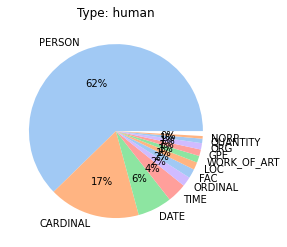

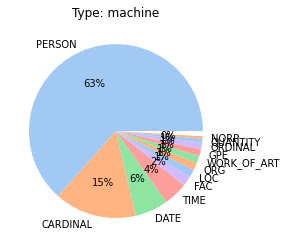

In [61]:
"""Check dep/pos/ner"""

import matplotlib.pyplot as plt
import seaborn as sns
import pdb

dataset = 'cn_novel_5billion' # en_grover, cn_novel_5billion
parse_choice = 'ner' # dep, pos

for author in ('human', 'machine'):
    # load data
    data_path = f'../result/static_data_analysis/{dataset}_{parse_choice}_{author}.json'
    data = load_save_json(data_path, 'load', verbose=0)
    data = list(data.items())
    data = sorted(data, key=lambda x:x[1], reverse=True)
    # print(data)

    TOP_N = 12

    #define data
    value = [x[1] for x in data][:TOP_N]
    description = [x[0] for x in data][:TOP_N]

    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]

    #create pie chart
    ax = plt.pie(value, labels = description, colors = colors, autopct='%.0f%%')
    #plt.title("PopularitY of Programming Language\n" + "Worldwide, Oct 2017 compared to a year ago", bbox={'facecolor':'0.8', 'pad':5})
    # ax.set_title(f'Author: {author}')
    plt.title('Type: ' + author)
    # pdb.set_trace()
    plt.show()

(25322, 3)


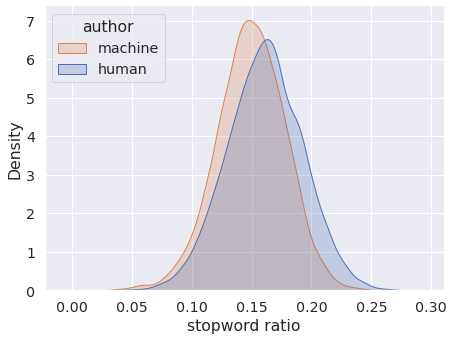

In [44]:
"""Check stopwords"""

import pdb
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dataset = 'cn_novel_5billion' # en_grover, cn_novel_5billion, en_writing_prompt
sen_ratio_data = pd.read_csv(f'../result/static_data_analysis/{dataset}_stopword_sen_ratio.csv')
print(sen_ratio_data.shape)
sns.set(font_scale = 1.3)
# sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.displot(sen_ratio_data, x="value", kind="kde", hue='author', fill=True, legend=True)
ax._legend. _visible=False
plt.legend(title='author', loc='upper left', labels=['machine', 'human'])
ax.set(xlabel='stopword ratio')
#plt.title()
plt.tight_layout()
plt.savefig(f'/home/iamlxb3/temp_rsync_dir/story_turing_test/vis/dataset_basic_stopwords_{dataset}.pdf')
plt.show()

stopword_ratio_data = pd.read_csv(f'../result/static_data_analysis/{dataset}_stopword_ratio.csv')
new_stopword_ratio_data = []
keep_N = 20
for author, author_data in stopword_ratio_data.groupby('author'):
    author_data = author_data[:keep_N]
    new_stopword_ratio_data.append(author_data)
new_stopword_ratio_data = pd.concat(new_stopword_ratio_data)
# print(stopword_ratio_data)
#stopword_ratio_data['index'] = stopword_ratio_data.index
#sns.lineplot(data=new_stopword_ratio_data, x="index_i", y='value', hue='author')


concrete_df: (101288, 4)


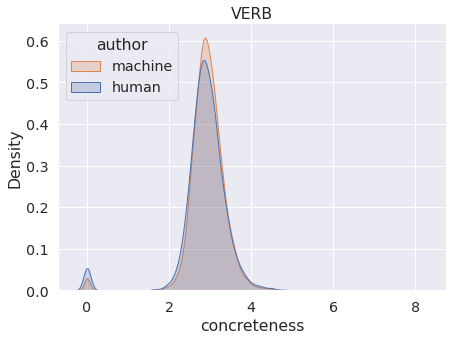

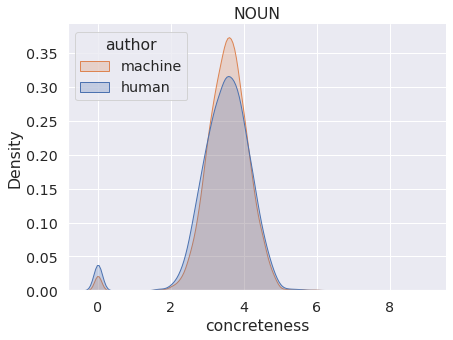

In [5]:
"""Check concreteness"""

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dataset = 'cn_novel_5billion' # cn_novel_5billion, en_grover, en_writing_prompt
sns.set(font_scale = 1.3)
concrete_df = pd.read_csv(f'../result/static_data_analysis/{dataset}_concreteness.csv')
print(f"concrete_df: {concrete_df.shape}")
target_pos = ('VERB', 'NOUN')
for pos in target_pos:
    pos_df = concrete_df[concrete_df['pos']==pos]
    # print(pos_df)
    ax = sns.displot(pos_df, x="value", kind="kde", hue='author',fill=True, legend=True)
    ax.set(xlabel='concreteness')
    ax._legend. _visible=False
    plt.legend(title='author', loc='upper left', labels=['machine', 'human'])
    plt.title(pos)
    plt.tight_layout()
    plt.savefig(f'/home/iamlxb3/temp_rsync_dir/story_turing_test/vis/dataset_basic_concreteness_{pos}_{dataset}.pdf')
    plt.show()

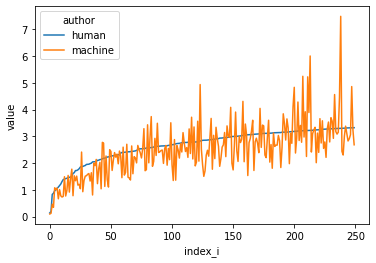

In [96]:
"""Check idf"""

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dataset = 'en_writing_prompt' # en_grover, cn_novel_5billion, en_writing_prompt
n_gram=2
idf_data = pd.read_csv(f'../result/static_data_analysis/{dataset}_ngram_idf.csv')
idf_data = idf_data[idf_data['n_gram']==n_gram][:500]
sns.lineplot(data=idf_data, x="index_i", y='value', hue='author')
plt.show()

(100, 5)
(100, 5)


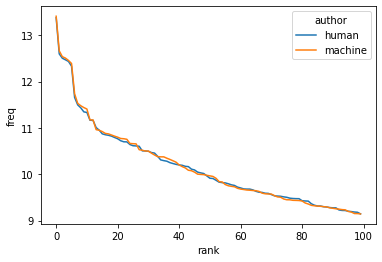

In [100]:
"""Check zipflaw"""

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dataset = 'en_grover' # en_grover, cn_novel_5billion, en_writing_prompt
n_gram=1
keep_N=100
zipflaw_data = pd.read_csv(f'../result/static_data_analysis/{dataset}_zipflaw.csv')
zipflaw_data = zipflaw_data[zipflaw_data['n_gram']==n_gram]

human_zipflaw_df = zipflaw_data[zipflaw_data['author'] == 'human'][:keep_N]
machine_zipflaw_df = zipflaw_data[zipflaw_data['author'] == 'machine'][:keep_N]
print(human_zipflaw_df.shape)
print(machine_zipflaw_df.shape)
plot_df = pd.concat([human_zipflaw_df, machine_zipflaw_df])

sns.lineplot(data=plot_df, x="rank", y='freq', hue='author')
plt.show()